# Precision Benchmark

In [1]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *
from timedependent_channels import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=5, suppress=True)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Spin-Spin Hamiltonian, No Decoherence

## Degree 5

In [2]:
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=5)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 0
                                   )
channel_list = [MagnusPropagator(liouvillian=lindblad_model, grid_size=grid_size,T = 1) for grid_size in range(10, 150)]

channel_model_gt = MagnusPropagator(liouvillian=lindblad_model, grid_size=10000, T = 1)

choi_gt = channel_model_gt.choi

choi_list =  [channel.choi for channel in channel_list]
infidelity_list1 = [np.linalg.norm(choi - choi_gt) for choi in choi_list]


## Degree 10

In [3]:
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=10)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 0
                                   )
channel_list = [MagnusPropagator(liouvillian=lindblad_model, grid_size=grid_size,T = 1) for grid_size in range(10, 150)]

channel_model_gt = MagnusPropagator(liouvillian=lindblad_model, grid_size=10000, T = 1)

choi_gt = channel_model_gt.choi

choi_list =  [channel.choi for channel in channel_list]
infidelity_list2 = [np.linalg.norm(choi - choi_gt) for choi in choi_list]


## Degree 20

In [4]:
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=20)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 0
                                   )
channel_list = [MagnusPropagator(liouvillian=lindblad_model, grid_size=grid_size,T = 1) for grid_size in range(10, 150)]

channel_model_gt = MagnusPropagator(liouvillian=lindblad_model, grid_size=10000, T = 1)

choi_gt = channel_model_gt.choi

choi_list =  [channel.choi for channel in channel_list]
infidelity_list3 = [np.linalg.norm(choi - choi_gt) for choi in choi_list]


## Degree 40

In [5]:
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=40)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 0
                                   )
channel_list = [MagnusPropagator(liouvillian=lindblad_model, grid_size=grid_size,T = 1) for grid_size in range(10, 150)]

channel_model_gt = MagnusPropagator(liouvillian=lindblad_model, grid_size=10000, T = 1)

choi_gt = channel_model_gt.choi

choi_list =  [channel.choi for channel in channel_list]
infidelity_list4 = [np.linalg.norm(choi - choi_gt) for choi in choi_list]


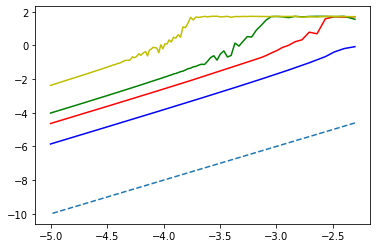

In [21]:
dt_list = 1/np.arange(10, 150)

plt.plot(np.log(dt_list), np.log(infidelity_list1), "b-")
plt.plot(np.log(dt_list), np.log(infidelity_list2), "r-")
plt.plot(np.log(dt_list), np.log(infidelity_list3), "g-")
plt.plot(np.log(dt_list), np.log(infidelity_list4), "y-")

plt.plot(np.log(dt_list), 2*np.log(dt_list), "--")

## Spin-Spin Hamiltonian, with Decoherence

In [17]:
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=5)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 2
                                   )
channel_list = [MagnusPropagator(liouvillian=lindblad_model, grid_size=grid_size,T = 1) for grid_size in range(10, 150)]

channel_model_gt = MagnusPropagator(liouvillian=lindblad_model, grid_size=10000, T = 1)

choi_gt = channel_model_gt.choi

choi_list =  [channel.choi for channel in channel_list]
infidelity_list5 = [np.linalg.norm(choi - choi_gt) for choi in choi_list]


In [9]:
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=10)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 2
                                   )
channel_list = [MagnusPropagator(liouvillian=lindblad_model, grid_size=grid_size,T = 1) for grid_size in range(10, 150)]

channel_model_gt = MagnusPropagator(liouvillian=lindblad_model, grid_size=10000, T = 1)

choi_gt = channel_model_gt.choi

choi_list =  [channel.choi for channel in channel_list]
infidelity_list6 = [np.linalg.norm(choi - choi_gt) for choi in choi_list]


In [10]:
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=20)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 2
                                   )
channel_list = [MagnusPropagator(liouvillian=lindblad_model, grid_size=grid_size,T = 1) for grid_size in range(10, 150)]

channel_model_gt = MagnusPropagator(liouvillian=lindblad_model, grid_size=10000, T = 1)

choi_gt = channel_model_gt.choi

choi_list =  [channel.choi for channel in channel_list]
infidelity_list7 = [np.linalg.norm(choi - choi_gt) for choi in choi_list]


In [11]:
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=40)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 2
                                   )
channel_list = [MagnusPropagator(liouvillian=lindblad_model, grid_size=grid_size,T = 1) for grid_size in range(10, 150)]

channel_model_gt = MagnusPropagator(liouvillian=lindblad_model, grid_size=10000, T = 1)

choi_gt = channel_model_gt.choi

choi_list =  [channel.choi for channel in channel_list]
infidelity_list8 = [np.linalg.norm(choi - choi_gt) for choi in choi_list]


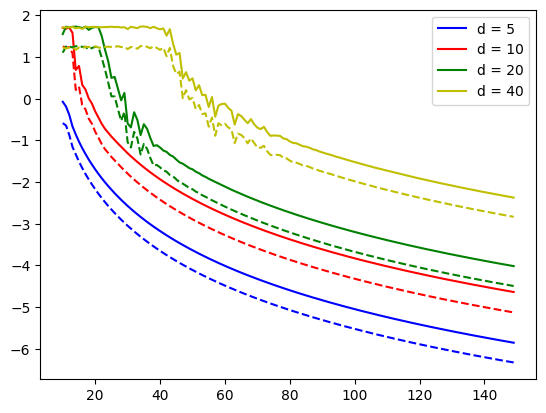

In [19]:
x_list = np.arange(10, 150)

plt.plot(x_list, np.log(infidelity_list1), "b-")
plt.plot(x_list, np.log(infidelity_list2), "r-")
plt.plot(x_list, np.log(infidelity_list3), "g-")
plt.plot(x_list, np.log(infidelity_list4), "y-")

plt.plot(x_list, np.log(infidelity_list5), "b--")
plt.plot(x_list, np.log(infidelity_list6), "r--")
plt.plot(x_list, np.log(infidelity_list7), "g--")
plt.plot(x_list, np.log(infidelity_list8), "y--")

plt.legend(["d = 5", "d = 10", "d = 20", "d = 40"])

## Visualization of Magnetic Field

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=5)

theta_sin = H_model.theta_sin.numpy().reshape(6,-1)
theta_cos = H_model.theta_cos.numpy().reshape(6,-1)


t = np.linspace(0, 1, 1000)

signal = 0
idx = 0
for i, theta in enumerate(zip(theta_sin[idx])):
    signal += theta*np.sin(2*np.pi*i*t)

for i, theta in enumerate(zip(theta_cos[idx])):
    signal += theta*np.cos(2*np.pi*i*t)

plt.plot(t, signal)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=10)

theta_sin = H_model.theta_sin.numpy().reshape(6,-1)
theta_cos = H_model.theta_cos.numpy().reshape(6,-1)


t = np.linspace(0, 1, 1000)

signal = 0
idx = 0
for i, theta in enumerate(zip(theta_sin[idx])):
    signal += theta*np.sin(2*np.pi*i*t)

for i, theta in enumerate(zip(theta_cos[idx])):
    signal += theta*np.cos(2*np.pi*i*t)

plt.plot(t, signal)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=20)

theta_sin = H_model.theta_sin.numpy().reshape(6,-1)
theta_cos = H_model.theta_cos.numpy().reshape(6,-1)


t = np.linspace(0, 1, 1000)

signal = 0
idx = 0
for i, theta in enumerate(zip(theta_sin[idx])):
    signal += theta*np.sin(2*np.pi*i*t)

for i, theta in enumerate(zip(theta_cos[idx])):
    signal += theta*np.cos(2*np.pi*i*t)

plt.plot(t, signal)

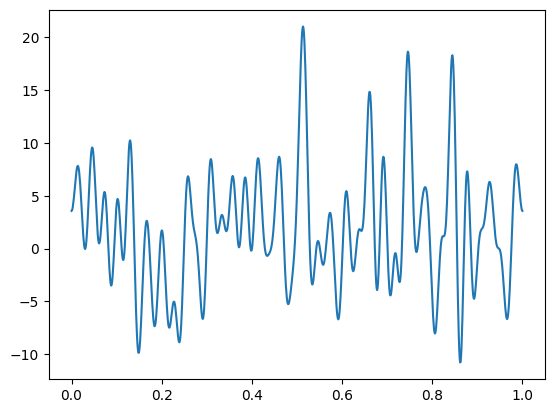

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=40)

theta_sin = H_model.theta_sin.numpy().reshape(6,-1)
theta_cos = H_model.theta_cos.numpy().reshape(6,-1)


t = np.linspace(0, 1, 1000)

signal = 0
idx = 0
for i, theta in enumerate(zip(theta_sin[idx])):
    signal += theta*np.sin(2*np.pi*i*t)

for i, theta in enumerate(zip(theta_cos[idx])):
    signal += theta*np.cos(2*np.pi*i*t)

plt.plot(t, signal)

## Noise Strength Sensitivity

In [47]:
tf.random.set_seed(42)
np.random.seed(42)

lindblad_model1 = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 0
                                    )

lindblad_model2 = deepcopy(lindblad_model1)
lindblad_model2.gamma = 2

channel_model1 = MagnusPropagator(liouvillian=lindblad_model1, grid_size=1000)
channel_model2 = MagnusPropagator(liouvillian=lindblad_model2, grid_size=1000)

T = 1
choi1 = channel_model1.choi(T)
choi2 = channel_model2.choi(T)
print(state_fidelity(choi1, choi2)/16)

tf.Tensor(0.6229850753599123, shape=(), dtype=float64)
